### H3.2

In [427]:
import pandas
import matplotlib.pyplot as plt
from math import *

import numpy as np

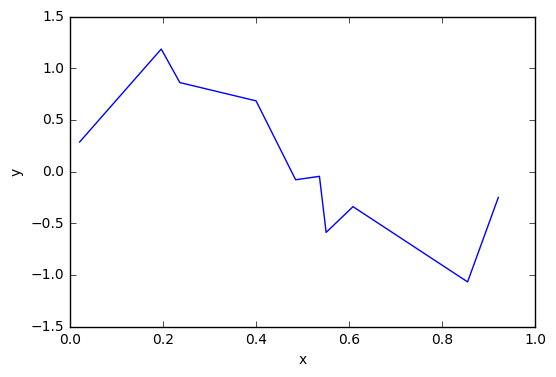

In [428]:
# Load data from csv file
file = "RegressionData.txt"
df = pandas.read_csv(file, sep=" ", header=None, names=["X", "y"])
df = df.sort_values(by="X")

raw_X = df.X
Y = df.y.values.reshape(len(df),1)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(df.X,df.y)


In [429]:
# Initialize Network
LIN_NODES = 1;
L1_NODES = 3;
LOUT_NODES = 1;
W1_DEFAULT = np.matrix(np.random.uniform(-2,2,(L1_NODES, LIN_NODES+1)))
W2_DEFAULT = np.matrix(np.random.uniform(-2,2, (LOUT_NODES, L1_NODES+1)))

print("Size Input: "+ str(LIN_NODES) )
print("No. weigths between Input and L1 "+ str(W1.shape) )
print("Size L1: "+ str(L1_NODES) )
print("No. weigths between L1 and Output "+ str(W2.shape) )
print("Size Output: "+ str(LOUT_NODES) )

print("W1 ( W1[:0] is bias term)")
print("W1 ( W1[:0] is bias term)")
print(W1_DEFAULT)

Size Input: 1
No. weigths between Input and L1 (3, 2)
Size L1: 3
No. weigths between L1 and Output (1, 4)
Size Output: 1
W1 ( W1[:0] is bias term)
W1 ( W1[:0] is bias term)
[[ 0.13356916  0.7941218 ]
 [-0.33647253  1.75639034]
 [ 1.89396336  1.85964764]]


The difference less than 0.000010 at iteration 1877
Total cost : 2.1791


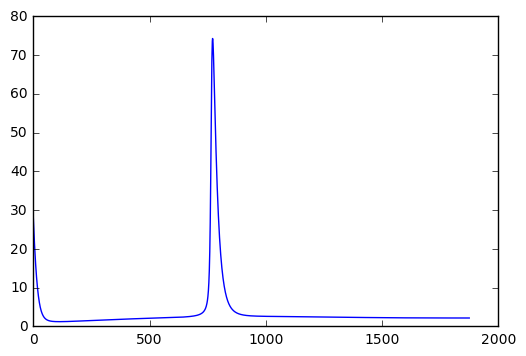

In [430]:
MAX_ITER = 3500
STOP_THRESHOLD = 0.00001
df['b'] = 1 # bias term

def deriTanh(x):
    return 1 - np.power( np.tanh(x), 2 )

def nnn( X, y ,W1,W2, eta):
    
    X = np.matrix(X)
    W1 = np.matrix(W1)
    W2 = np.matrix(W2)
    res = []
    it = 0
    while it < MAX_ITER :
        # Forward prop.
        H1 = np.matrix(X) * W1.T # 10x2 * 2x3 -> 10x3
        
        S1 = np.ones((H1.shape[0],L1_NODES+1))
        S1[:,1:] = np.tanh(H1) # add bias term
        pred = S1*W2.T #  10x4 * 4x1

        # Backward propd
        dyDy_hat = ( pred - y )

        dJdW2 = dyDy_hat.T * S1[:,1:] / len(y)
        dJdW1 = np.multiply( deriTanh(H1).T * ( np.multiply(dyDy_hat, X[:,1:])), W2[:,1:].T ) / len(y)
        
        delta1 = np.multiply(deriTanh(H1).T * ( np.multiply(dyDy_hat, X[:,0])), W2[:,0].T ) / len(y)
        
        W1[:,0] = W1[:,0]   - eta*(delta1)
        W1[:,1:] = W1[:,1:] - eta*dJdW1
        
        W2[:,0]  = W2[:,0]  - eta*(1)
        W2[:,1:] = W2[:,1:] - eta*dJdW2
                
        quad_cost = np.sum(np.power( pred.reshape(len(y),1) - y, 2) * 0.5)
        if  it > 0 and abs( res[it-1]['err'] - quad_cost) / res[it-1]['err'] < STOP_THRESHOLD :
            print("The difference less than %.6f at iteration %d" % (STOP_THRESHOLD, it+1) )
            break
        res.append({ "err": quad_cost, "prediction": pred, 'dJdW2': dJdW2, 'dJdW1': dJdW1, 'L1_signal': S1  })
        it = it + 1
    return res

result = nnn(df[['b','X']], Y, W1_DEFAULT,W2_DEFAULT, 0.01)
res_df = pandas.DataFrame.from_dict(result);
plt.plot( np.arange(len(res_df)), res_df['err'])
print("Total cost : %.4f" %(result[-1]['err']))

### Backpropagation formulas

**Weights of Layer 2 ( Output Layer )**
$$
\Delta W_{kj}^{21} = (\hat{y} - y )\delta^{(2)}_kS_j^{(1)}
$$

Because the output activation function is linear, hence

$$\delta^{(2)}_k = 1 $$

$$
\Delta W_{kj}^{21} = (\hat{y} - y )S_j^{(1)}
$$


**Weights of Layer 1 ( Hidden Layer )**
$$
\Delta W_{ji}^{10} = (\hat{y} - y )\delta^{(1)}S_i^{(0)}
$$
where
$$
\delta^{(1)}_j = f'(h^{(1)}_j)\sum_{ (2,k) \in children(1,j) }{ W^{(21)}_{kj}\delta^{(2)}_{k} }
$$
Hence
$$
\Delta W_{ji}^{10} = (\hat{y} - y )S_i^{(0)}f'(h^{(1)}_j)\sum_{ (2,k) \in children(1,j) }{ W^{(21)}_{kj}\delta^{(2)}_{k} }
$$

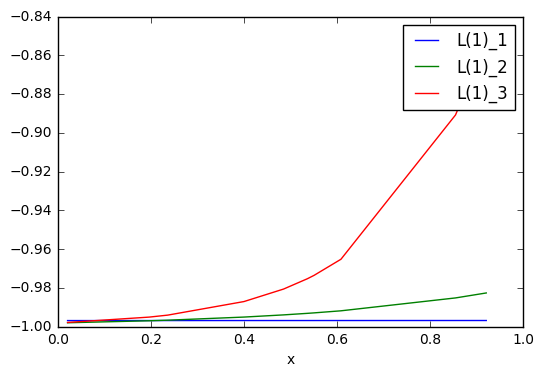

In [431]:
# b)
signals = result[-1]['L1_signal']

plt.xlabel('x')
plt.plot( df.X, signals[:,1], label= "L(1)_1" )
plt.plot( df.X, signals[:,2], label= "L(1)_2" )
plt.plot( df.X, signals[:,3], label= "L(1)_3" )
plt.legend()


[[-0.13108306]
 [-0.14681978]
 [-0.15199646]
 [-0.18341896]
 [-0.20938979]
 [-0.22975305]
 [-0.23626664]
 [-0.2665349 ]
 [-0.51378252]
 [-0.63266162]]
[[-1.01546018]
 [-1.5537405 ]
 [-1.67633131]
 [-2.15228316]
 [-2.37263832]
 [-2.4941392 ]
 [-2.52673978]
 [-2.65056968]
 [-3.05900754]
 [-3.13991771]]


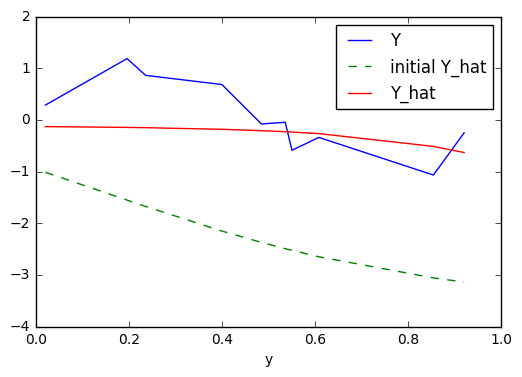

In [439]:
# c )
final_pred = result[-1]['prediction']

print(result[-1]['prediction'])
print(result[0]['prediction'])

plt.xlabel('x')
plt.xlabel('y')

plt.plot( df.X, df.y, label= "Y" )
plt.plot( df.X, result[0]['prediction'], '--', label= "initial Y_hat" )
plt.plot( df.X, final_pred, label= "Y_hat" )
plt.legend()